In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# Add one color dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
# Validation split
x_val, y_val = x_train[-10000:], y_train[-10000:]
# x_train, y_train = x_train[:-5000], y_train[:-5000]
print(x_train.shape)

(60000, 28, 28, 1)


Data augmentation should reduce over-fitting. We may still see some unrealisticaly high accuracy on validation, but we don't want to reduce training set by 10k examples, whuch carry a lot of knowledge for a model.

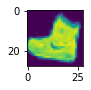

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = x_train[0]
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=3, height_shift_range=3, zoom_range=0.1, fill_mode='constant', cval=0, horizontal_flip=False)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
img = it.next().reshape((28,28))
pyplot.imshow(img)
pyplot.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=x_train.shape[1:]))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(4096,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
generator = datagen.flow(x_train, y_train)
model.fit(generator, epochs=1000, validation_data=(x_val, y_val), callbacks=[EarlyStopping('val_accuracy', patience=10, restore_best_weights=True)])

Epoch 1/1000
1875/1875 [==============================] - 22s 11ms/step - loss: 0.7836 - accuracy: 0.7165 - val_loss: 0.4701 - val_accuracy: 0.8250
Epoch 2/1000
1875/1875 [==============================] - 22s 11ms/step - loss: 0.4469 - accuracy: 0.8329 - val_loss: 0.3912 - val_accuracy: 0.8627
Epoch 3/1000
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3778 - accuracy: 0.8610 - val_loss: 0.2638 - val_accuracy: 0.9017
Epoch 4/1000
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3457 - accuracy: 0.8733 - val_loss: 0.2609 - val_accuracy: 0.9013
Epoch 5/1000
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3212 - accuracy: 0.8797 - val_loss: 0.2304 - val_accuracy: 0.9120
Epoch 6/1000
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3046 - accuracy: 0.8875 - val_loss: 0.2285 - val_accuracy: 0.9107
Epoch 7/1000
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2924 - accuracy: 0.8919 - val_

In [ ]:
preds = np.argmax(model.predict(x_test), axis=1)
import pandas as pd
prediction = pd.DataFrame(preds, columns=['Class']).to_csv('prediction.csv')


In [ ]:
# Get 10 misslabeled examples
lab = model.predict(x_val)
cap = 10
print(np.argmax(lab[65]), y_val[65])
for i in range(len(lab)):
  if np.argmax(lab[i]) != y_val[i] and cap > 0:
    print(i)
    cap = cap - 1

5 5
13
30
116
198
244
251
256
312
342
354


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
def displayer(model, img, layer_no):
  img = expand_dims(img, axis=0)
  submodel = Model(inputs=model.inputs, outputs=model.layers[layer_no].output)
  feature_maps = submodel.predict(img)
  square = 10
  ix = 1
  for _ in range(square):
    for _ in range(1):
      # specify subplot and turn of axis
      ax = plt.subplot(1, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      # plot filter channel in grayscale
      plt.imshow(feature_maps[0, :, :, 2*ix-1], cmap='gray')
      ix += 1
  # show the figure
  plt.show()

Pullover vs Dress:


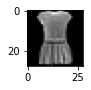

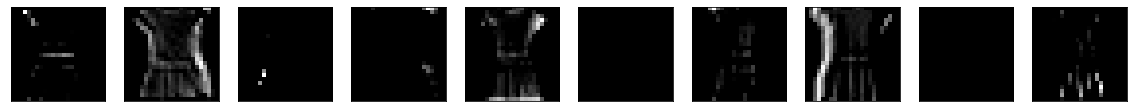

Sneaker vs Ankle boot:


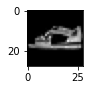

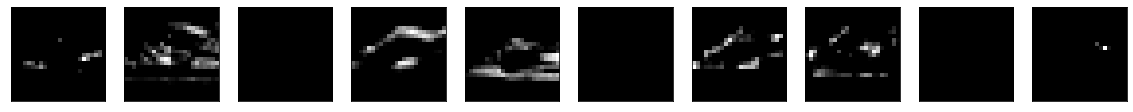

Tshirt vs Pullover:


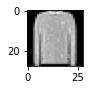

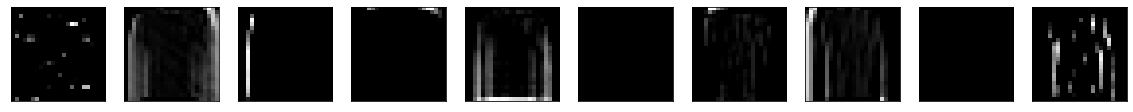

In [ ]:

print("Pullover vs Dress:")
plt.imshow(np.resize(x_train[3], (28,28)), cmap='gray')
plt.show()
plt.rcParams["figure.figsize"] = (20,30)
displayer(model, x_train[3], 2)
print("Sneaker vs Ankle boot:")
plt.rcParams["figure.figsize"] = (1,30)
plt.imshow(np.resize(x_train[13], (28,28)), cmap='gray')
plt.show()
plt.rcParams["figure.figsize"] = (20,30)
displayer(model, x_train[13], 2)
print("Tshirt vs Pullover:")
plt.rcParams["figure.figsize"] = (1,30)
plt.imshow(np.resize(x_train[65], (28,28)), cmap='gray')
plt.show()
plt.rcParams["figure.figsize"] = (20,30)
displayer(model, x_train[65], 2)

plt.rcParams["figure.figsize"] = (1,30)

Model tends to misclassify similar classes, which was to be expected